<a href="https://colab.research.google.com/github/MPramodhkumar/-Fake-News-Detection/blob/main/OPenCV_Suduko_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
!pip install opencv-python-headless pytesseract
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (6,200 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
uploaded = files.upload()

Saving Sudoku_Puzzle.png to Sudoku_Puzzle.png


In [ ]:
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

Uploaded file: Sudoku_Puzzle.png


In [ ]:
original_image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file
original_image = cv2.imread(original_image_path)
if original_image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    print("Original image loaded successfully.")

Original image loaded successfully.


In [ ]:
sudoku_grid = np.array([
    [8, 0, 0, 4, 0, 6, 0, 0, 7],
    [0, 0, 0, 0, 0, 0, 4, 0, 0],
    [0, 1, 0, 0, 0, 0, 6, 5, 0],
    [5, 0, 9, 0, 3, 0, 7, 8, 0],
    [0, 0, 0, 0, 7, 0, 0, 0, 0],
    [0, 4, 8, 0, 2, 0, 1, 0, 3],
    [0, 5, 2, 0, 0, 0, 0, 9, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0],
    [3, 0, 0, 9, 0, 2, 0, 0, 5]
])

In [ ]:
def is_valid_move(grid, row, col, num):
    # Check if 'num' is not in the given row and column
    for i in range(9):
        if grid[row][i] == num or grid[i][col] == num:
            return False
    # Check if 'num' is not in the 3x3 subgrid
    box_row = row // 3 * 3
    box_col = col // 3 * 3
    for i in range(box_row, box_row + 3):
        for j in range(box_col, box_col + 3):
            if grid[i][j] == num:
                return False
    return True

def solve_sudoku(grid):
    # Iterate through the grid to find empty cells
    for row in range(9):
        for col in range(9):
            if grid[row, col] == 0:  # Find an empty cell
                for num in range(1, 10):  # Try numbers 1-9
                    if is_valid_move(grid, row, col, num):
                        grid[row, col] = num  # Make the move
                        if solve_sudoku(grid):  # Recur
                            return True
                        grid[row, col] = 0  # Backtrack
                return False  # Trigger backtracking
    return True  # Solved

In [ ]:
solve_sudoku(sudoku_grid)

True

In [ ]:
# Step 9: Define the function to overlay the solved Sudoku on the original image
def overlay_solved_sudoku(original_image, solved_grid, cell_size=28):
    height, width = solved_grid.shape
    original_resized = cv2.resize(original_image, (width * cell_size, height * cell_size))

    for i in range(9):
        for j in range(9):
            if solved_grid[i, j] != 0:  # Check if the cell is not empty
                x, y = j * cell_size + 5, i * cell_size + 20
                cv2.putText(original_resized, str(solved_grid[i, j]), (x, y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)

    return original_resized  # This return statement is correctly indented


In [ ]:
final_image = overlay_solved_sudoku(original_image, sudoku_grid)

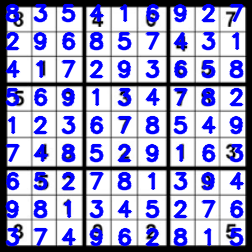

In [ ]:
cv2_imshow(final_image)